<a href="https://colab.research.google.com/github/ranjitk11/myFirstProject/blob/main/sales_prediction_using_python.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import numpy as np
import pandas as pd
import warnings 
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt
import seaborn as sns

In [3]:
df = pd.read_csv('/content/Advertising.csv')
df.head()

,Unnamed: 0,TV,Radio,Newspaper,Sales
0,1,230.1,37.8,69.2,22.1
1,2,44.5,39.3,45.1,10.4
2,3,17.2,45.9,69.3,9.3
3,4,151.5,41.3,58.5,18.5
4,5,180.8,10.8,58.4,12.9


In [4]:
df.shape

(200, 5)

In [5]:
df.columns.values.tolist()

['Unnamed: 0', 'TV', 'Radio', 'Newspaper', 'Sales']

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  200 non-null    int64  
 1   TV          200 non-null    float64
 2   Radio       200 non-null    float64
 3   Newspaper   200 non-null    float64
 4   Sales       200 non-null    float64
dtypes: float64(4), int64(1)
memory usage: 7.9 KB


In [7]:
df.describe()

,Unnamed: 0,TV,Radio,Newspaper,Sales
count,200.000000,200.000000,200.000000,200.000000,200.000000
mean,100.500000,147.042500,23.264000,30.554000,14.022500
std,57.879185,85.854236,14.846809,21.778621,5.217457
min,1.000000,0.700000,0.000000,0.300000,1.600000
25%,50.750000,74.375000,9.975000,12.750000,10.375000
50%,100.500000,149.750000,22.900000,25.750000,12.900000
75%,150.250000,218.825000,36.525000,45.100000,17.400000
max,200.000000,296.400000,49.600000,114.000000,27.000000


In [8]:
df.isnull().sum()

Unnamed: 0    0
TV            0
Radio         0
Newspaper     0
Sales         0
dtype: int64

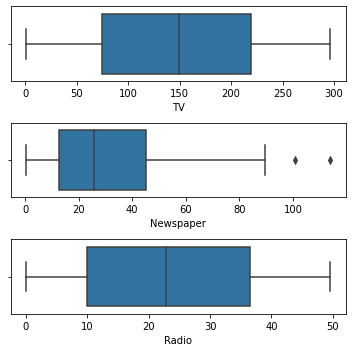

In [9]:
fig, axs = plt.subplots(3, figsize = (5,5))
plt1 = sns.boxplot(df['TV'], ax = axs[0])
plt2 = sns.boxplot(df['Newspaper'], ax = axs[1])
plt3 = sns.boxplot(df['Radio'], ax = axs[2])
plt.tight_layout()

<AxesSubplot:xlabel='Newspaper', ylabel='Density'>

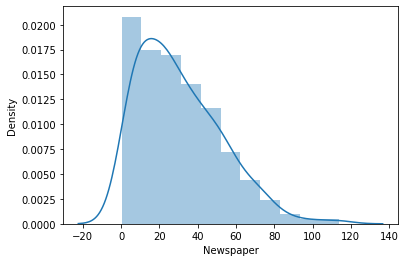

In [10]:
sns.distplot(df['Newspaper'])

In [11]:
iqr = df.Newspaper.quantile(0.75) - df.Newspaper.quantile(0.25)

In [12]:
lower_bridge = df['Newspaper'].quantile(0.25) - (iqr*1.5)
upper_bridge = df['Newspaper'].quantile(0.75) + (iqr*1.5)
print(lower_bridge)
print(upper_bridge)

-35.775000000000006
93.625


In [13]:
data = df.copy()

In [14]:
data.loc[data['Newspaper']>=93, 'Newspaper'] = 93

<AxesSubplot:xlabel='Newspaper'>

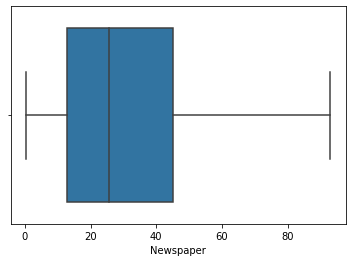

In [15]:
sns.boxplot(data['Newspaper'])

<AxesSubplot:xlabel='Sales'>

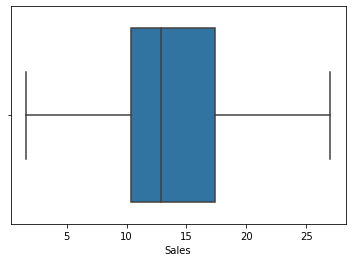

In [16]:
sns.boxplot(data['Sales'])

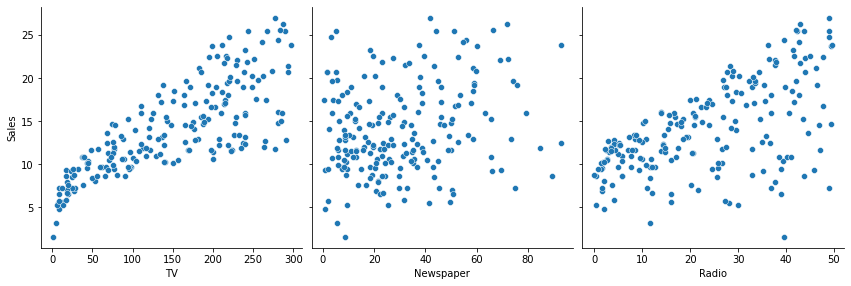

In [17]:
sns.pairplot(data, x_vars=['TV', 'Newspaper', 'Radio'],
             y_vars='Sales', height = 4, aspect= 1, kind='scatter')
plt.show()

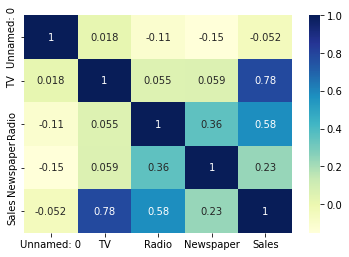

In [18]:
sns.heatmap(data.corr(), cmap='YlGnBu', annot = True)
plt.show()

In [19]:
important_features = list(df.corr()['Sales'][(df.corr()['Sales']>+0.5)|(df.corr()['Sales']<-0.5)].index)

In [20]:
print(important_features)

['TV', 'Radio', 'Sales']


In [22]:
x = data['TV']
y = data['Sales']

In [23]:
x= x.values.reshape(-1,1)

In [24]:
x

array([[230.1],
       [ 44.5],
       [ 17.2],
       [151.5],
       [180.8],
       [  8.7],
       [ 57.5],
       [120.2],
       [  8.6],
       [199.8],
       [ 66.1],
       [214.7],
       [ 23.8],
       [ 97.5],
       [204.1],
       [195.4],
       [ 67.8],
       [281.4],
       [ 69.2],
       [147.3],
       [218.4],
       [237.4],
       [ 13.2],
       [228.3],
       [ 62.3],
       [262.9],
       [142.9],
       [240.1],
       [248.8],
       [ 70.6],
       [292.9],
       [112.9],
       [ 97.2],
       [265.6],
       [ 95.7],
       [290.7],
       [266.9],
       [ 74.7],
       [ 43.1],
       [228. ],
       [202.5],
       [177. ],
       [293.6],
       [206.9],
       [ 25.1],
       [175.1],
       [ 89.7],
       [239.9],
       [227.2],
       [ 66.9],
       [199.8],
       [100.4],
       [216.4],
       [182.6],
       [262.7],
       [198.9],
       [  7.3],
       [136.2],
       [210.8],
       [210.7],
       [ 53.5],
       [261.3],
       [

In [25]:
y

0      22.1
1      10.4
2       9.3
3      18.5
4      12.9
       ... 
195     7.6
196     9.7
197    12.8
198    25.5
199    13.4
Name: Sales, Length: 200, dtype: float64

In [26]:
print(x.shape, y.shape)

(200, 1) (200,)


In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x,y, test_size=0.33)

In [28]:
print(x_train.shape, y_train.shape)

(134, 1) (134,)


In [29]:
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [30]:
knn = KNeighborsRegressor().fit(x_train, y_train)
knn

KNeighborsRegressor()

In [31]:
knn_train_pred = knn.predict(x_train)

In [32]:
knn_test_pred = knn.predict(x_test)

In [33]:
print(knn_train_pred, knn_train_pred)

[14.88 13.1   4.48 13.64 13.78 13.78 11.24  8.26 14.88 19.7  19.68 17.9
 14.6   8.34 12.54 13.08 17.64 11.6  15.28 13.66 12.34  7.88 13.12 10.9
 12.54 11.16 17.72 13.06 10.44 17.8  15.86 11.32 10.88  7.42  9.76  8.26
 11.12 20.54 13.78 15.76 10.36  8.26 14.88 16.02 17.28 17.22  8.26 15.56
 10.88  4.48 17.72 16.32 10.92  9.84 10.44 10.44 10.88 12.24  7.8   6.42
 11.32 18.4  18.22 21.56 12.74 12.54 19.16 20.54 18.1  16.32 15.96 19.38
 11.8  10.36 17.8  10.2  15.06 15.42 12.9  13.08 15.18 21.24 16.32 10.2
 10.12 10.44  7.22 10.88 15.28 16.02 19.38 13.08 14.02 12.92 19.68  5.6
 14.02 18.4  17.26 10.36 15.28  7.42 19.16 12.9   6.42 19.68 10.36 20.78
 18.1  19.28 15.02 16.18  5.6   9.4  17.28 20.78 13.08  7.8  14.74 15.28
 17.26 14.7  15.18 16.02 12.3  10.88 18.22  8.34 15.86 18.1  11.12 14.74
 12.92 16.54] [14.88 13.1   4.48 13.64 13.78 13.78 11.24  8.26 14.88 19.7  19.68 17.9
 14.6   8.34 12.54 13.08 17.64 11.6  15.28 13.66 12.34  7.88 13.12 10.9
 12.54 11.16 17.72 13.06 10.44 17.8  15.86 

In [34]:
svr = SVR().fit(x_train,y_train)
svr

SVR()

In [35]:
svr_train_pred = svr.predict(x_train)
svr_test_predict =  svr.predict(x_test)

In [36]:
print(svr_train_pred,svr_test_predict)

[16.0407943  12.91220794  7.78393434 12.81797609 17.0748633  15.0226773
 11.11702722  8.39988604 16.14436887 16.81862275 17.19150002 17.67697752
 13.10022991  8.53716787 11.17788471 13.23272837 17.25335363 11.44389749
 14.45401652 13.17258251 13.27600357  8.49305324 12.66882075 10.47183711
 11.27819197 11.51398995 17.29676021 12.17071132 10.26774303 16.90656276
 16.46167449 10.80427964 10.68799575  8.12805328  9.96486958  8.39610074
 11.69500693 17.69994207 17.0748633  14.01804698  9.01195722  8.41893163
 16.14436887 17.50850934 17.54517089 17.4270565   8.35131163 17.18625429
 10.72266019  7.82635645 17.31357767 15.59352132 10.59616004  9.50722702
 10.34544143 10.40889155 10.7269808  11.96148472  8.19785225  7.90216356
 10.88912647 16.93631914 17.59723875 17.44395881 16.26914114 11.22218713
 17.43253674 17.70508421 17.51373369 15.72670626 16.58236236 17.3620396
 11.85512356  9.25481549 16.87256756  9.17939697 15.41927573 17.53016903
 13.31954205 12.2894338  13.77865802 17.29840968 15.5

In [37]:
import statsmodels.api as sm

In [38]:
x_train_constant = sm.add_constant(x_train)

In [39]:
model = sm.OLS(y_train, x_train_constant).fit()

In [40]:
model.params

const    7.126129
x1       0.044773
dtype: float64

In [41]:
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:                  Sales   R-squared:                       0.607
Model:                            OLS   Adj. R-squared:                  0.604
Method:                 Least Squares   F-statistic:                     204.1
Date:                Thu, 09 Mar 2023   Prob (F-statistic):           1.44e-28
Time:                        09:02:44   Log-Likelihood:                -342.48
No. Observations:                 134   AIC:                             689.0
Df Residuals:                     132   BIC:                             694.8
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const          7.1261      0.532     13.383      0.0

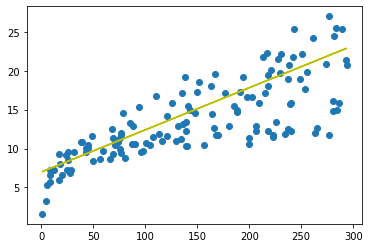

In [42]:
plt.scatter(x_train,y_train)
plt.plot(x_train, 6.9955 + 0.0541 * x_train, 'y')
plt.show()

In [43]:
y_train_pred= model.predict(x_train_constant)
res =  (y_train - y_train_pred)
res

152    0.626725
159   -0.122734
130   -5.557470
73    -1.919756
100   -5.383646
         ...   
137    1.419499
13    -1.791497
90    -1.939144
77     1.678724
141    3.401340
Name: Sales, Length: 134, dtype: float64

In [44]:
y_train_pred

array([15.9732751 , 13.02273389,  7.15746988, 12.91975598, 17.08364569,
       15.05095114, 10.96317554,  8.24993127, 16.07177572, 16.77023464,
       20.09686912, 18.99993043, 13.22421243,  8.4066368 , 11.03033505,
       13.36300875, 17.33437454, 11.3303142 , 14.54053886, 13.30032654,
       13.40778176,  8.35738649, 12.75409585, 10.28710312, 11.14226757,
       11.41090561, 17.40153405, 12.18100135, 10.08562459, 16.87321256,
       16.38518677, 10.62737798, 10.50649086,  7.89622451,  9.79460004,
        8.24545397, 11.62133875, 18.48951814, 17.08364569, 14.13758179,
        8.89466258,  8.27231777, 16.07177572, 17.79105922, 17.87612793,
       17.62539909,  8.19172636, 17.23587392, 10.54230926,  7.30969811,
       17.42839785, 15.56136343, 10.41246754,  9.36477916, 10.1617387 ,
       10.22442091, 10.54678657, 11.9347498 ,  7.99472512,  7.50222204,
       10.71692399, 16.90903096, 18.01492426, 19.67152554, 16.19266284,
       11.07958536, 19.69391205, 18.56115495, 19.52377462, 15.68

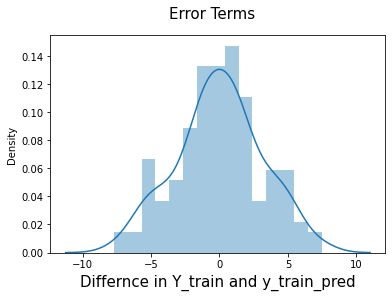

In [45]:
fig = plt.figure()
sns.distplot(res, bins = 15)
fig.suptitle('Error Terms', fontsize = 15)
plt.xlabel('Differnce in Y_train and y_train_pred', fontsize = 15)
plt.show()

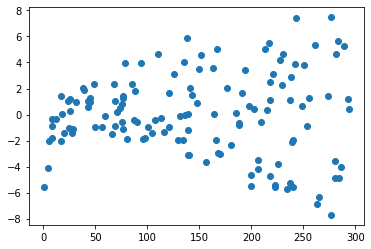

In [46]:
plt.scatter(x_train, res)
plt.show()

In [48]:
x_test_constant = sm.add_constant(x_test)
y_pred = model.predict(x_test_constant)

In [49]:
y_pred

array([16.5598015 , 15.05095114, 17.29855613, 16.26429965, 17.15528251,
       20.39684827, 17.34780644, 14.795745  ,  8.00367973,  7.8827926 ,
       11.47806513,  7.51117664, 18.2477439 , 16.56427881, 10.1886025 ,
        9.70057672,  8.77825276, 11.43329212, 16.68068863, 15.87477449,
       12.63768603, 10.48858166, 20.0028458 , 14.84947261, 19.01783963,
       16.73889354,  7.71265518, 15.77627387,  7.96786132, 18.88799791,
       11.3437461 , 16.98962238,  7.45297173,  7.71713248, 19.07604454,
       15.9732751 , 13.83312533, 14.96588243, 10.12144299,  9.52148469,
       16.03148001, 14.43756094, 10.47067245, 17.51794387, 12.08250073,
        8.83645767, 16.04043461, 14.99274623, 16.30459536, 15.4046579 ,
       12.04220502,  8.32604538, 12.37352528, 11.17360867, 16.81500765,
       17.86717333, 12.5078443 , 12.99587009, 15.53449963, 17.87612793,
        7.96338402, 11.72431667,  9.91548716, 16.96723587, 20.14164212,
       15.30167999])

In [50]:
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

In [51]:
np.sqrt(mean_squared_error(y_test,y_pred))

3.5490892776590894

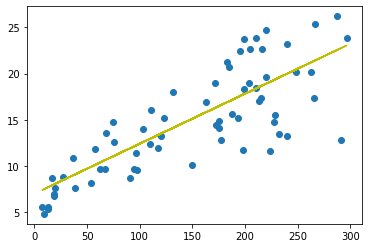

In [52]:
plt.scatter(x_test,y_test)
plt.plot(x_test, 6.9955 + 0.0541 *  x_test, 'y')
plt.show()